In [1]:
from platform import python_version
print(python_version())

3.9.12


In [1]:
pwd


'C:\\Users\\kasireddy madhavi'

In [2]:
import os
os.chdir('D:/dissertation project/dataset')


In [3]:
pwd


'D:\\dissertation project\\dataset'

# Loading the dataset

In [4]:
# Load dataset into a Pandas DataFrame
import pandas as pd
df=pd.read_csv("apple_iphone_11_reviews.csv")
# Display the first few rows
df.head()

,index,product,helpful_count,total_comments,url,review_country,reviewed_at,review_text,review_rating,product_company,profile_name,review_title
0,0,Apple iPhone XR (64GB) - Black,"5,087 people found this helpful",24,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,12-12-2018,NOTE:,3.0 out of 5 stars,Apple,Sameer Patil,"Which iPhone you should Purchase ? iPhone 8, X..."
1,1,Apple iPhone XR (64GB) - Black,"2,822 people found this helpful",6,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,17-11-2018,Very bad experience with this iPhone xr phone....,1.0 out of 5 stars,Apple,Amazon Customer,Don't buy iPhone xr from Amazon.
2,2,Apple iPhone XR (64GB) - Black,"1,798 people found this helpful",0,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,27-01-2019,Amazing phone with amazing camera coming from ...,5.0 out of 5 stars,Apple,A,Happy with the purchase
3,3,Apple iPhone XR (64GB) - Black,"1,366 people found this helpful",14,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,02-05-2019,So I got the iPhone XR just today. The product...,1.0 out of 5 stars,Apple,Shubham Dutta,Amazon is not an apple authorised reseller. Pl...
4,4,Apple iPhone XR (64GB) - Black,536 people found this helpful,5,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,24-05-2019,I've been an android user all my life until I ...,5.0 out of 5 stars,Apple,Nepuni Lokho,Excellent Battery life and buttery smooth UI


In [5]:
# Concatenate 'review_text' and 'review_title' columns into a new 'reviews' column
df['reviews'] = df['review_title'] + ' ' + df['review_text']
# Drop the previous 'review_text' and 'review_title' columns
df.drop(['review_text', 'review_title'], axis=1, inplace=True)
# Display the updated DataFrame
df.head()

,index,product,helpful_count,total_comments,url,review_country,reviewed_at,review_rating,product_company,profile_name,reviews
0,0,Apple iPhone XR (64GB) - Black,"5,087 people found this helpful",24,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,12-12-2018,3.0 out of 5 stars,Apple,Sameer Patil,"Which iPhone you should Purchase ? iPhone 8, X..."
1,1,Apple iPhone XR (64GB) - Black,"2,822 people found this helpful",6,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,17-11-2018,1.0 out of 5 stars,Apple,Amazon Customer,Don't buy iPhone xr from Amazon. Very bad expe...
2,2,Apple iPhone XR (64GB) - Black,"1,798 people found this helpful",0,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,27-01-2019,5.0 out of 5 stars,Apple,A,Happy with the purchase Amazing phone with ama...
3,3,Apple iPhone XR (64GB) - Black,"1,366 people found this helpful",14,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,02-05-2019,1.0 out of 5 stars,Apple,Shubham Dutta,Amazon is not an apple authorised reseller. Pl...
4,4,Apple iPhone XR (64GB) - Black,536 people found this helpful,5,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,24-05-2019,5.0 out of 5 stars,Apple,Nepuni Lokho,Excellent Battery life and buttery smooth UI I...


In [6]:
#data types of the attributes
data_types=df.dtypes
print(data_types)
# Get the size of the dataset (number of rows and columns)
num_rows, num_columns = df.shape
# Display the size of the dataset
print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

index               int64
product            object
helpful_count      object
total_comments      int64
url                object
review_country     object
reviewed_at        object
review_rating      object
product_company    object
profile_name       object
reviews            object
dtype: object
Number of rows: 5010
Number of columns: 11



# Data PRE-Processing

##### Data Cleaning
removal of stopwords
removal of punctuations and special characters
convert into lowercase
Stemming and Lemmatization:

In [7]:
#data cleaning
import pandas as pd
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer  # Import the lemmatizer

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Preprocessing function
def preprocess_text(text):
    if isinstance(text, str):
        text = text.lower()
        text = ''.join([char for char in text if char not in string.punctuation])
        tokens = word_tokenize(text)
        
# Remove stopwords and non-alphabetic words, and lemmatize
        stop_words = set(stopwords.words('english'))

        filtered_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words and word.isalpha()]
        
        cleaned_text = ' '.join(filtered_tokens)
        return cleaned_text
    else:
        return ""

# Apply the preprocess_text function to your 'reviews' column
df['cleaned_reviews'] = df['reviews'].apply(preprocess_text)

# Print both the original and cleaned reviews
print(df[['cleaned_reviews','reviews']])


                                        cleaned_reviews  \
0                    iphone purchase iphone x x xr note   
1     dont buy iphone xr amazon bad experience iphon...   
2     happy purchase amazing phone amazing camera co...   
3     amazon apple authorised reseller please take n...   
4     excellent battery life buttery smooth ui ive a...   
...                                                 ...   
5005                              dhamaka phone dhamaka   
5006                                       good goodbye   
5007                 fantabulous phone easy use nothing   
5008                                  fantastic superbb   
5009                              best purchase nothing   

                                                reviews  
0     Which iPhone you should Purchase ? iPhone 8, X...  
1     Don't buy iPhone xr from Amazon. Very bad expe...  
2     Happy with the purchase Amazing phone with ama...  
3     Amazon is not an apple authorised reseller. Pl...  
4

In [8]:
# Define a function to extract numeric values from the text
def extract_numeric(value):
    try:
        return int(value.split()[0].replace(',', ''))
    except:
        return 0

# Apply the function to the "helpful_count" column
df['helpful_count'] = df['helpful_count'].apply(extract_numeric)

# Display the updated dataset
print(df)


      index                         product  helpful_count  total_comments  \
0         0  Apple iPhone XR (64GB) - Black           5087              24   
1         1  Apple iPhone XR (64GB) - Black           2822               6   
2         2  Apple iPhone XR (64GB) - Black           1798               0   
3         3  Apple iPhone XR (64GB) - Black           1366              14   
4         4  Apple iPhone XR (64GB) - Black            536               5   
...     ...                             ...            ...             ...   
5005   5005  Apple iPhone XR (64GB) - Black              0               0   
5006   5006  Apple iPhone XR (64GB) - Black              0               0   
5007   5007  Apple iPhone XR (64GB) - Black              0               0   
5008   5008  Apple iPhone XR (64GB) - Black              0               0   
5009   5009  Apple iPhone XR (64GB) - Black              0               0   

                                                    url review_

In [9]:
# Extract the numerical rating from the 'review_rating' column
if 'review_rating' in df.columns:
    df['numeric_rating'] = df['review_rating'].str.extract(r'(\d+\.\d+)').astype(float)
    # Drop the original 'review_rating' column
    df.drop(columns=['review_rating'], inplace=True)
else:
    print("Column 'review_rating' not found in DataFrame.")

# Apply the preprocess_text function to your 'reviews' column
df['cleaned_reviews'] = df['reviews'].apply(preprocess_text)

# Display the updated DataFrame
print(df.head())


   index                         product  helpful_count  total_comments  \
0      0  Apple iPhone XR (64GB) - Black           5087              24   
1      1  Apple iPhone XR (64GB) - Black           2822               6   
2      2  Apple iPhone XR (64GB) - Black           1798               0   
3      3  Apple iPhone XR (64GB) - Black           1366              14   
4      4  Apple iPhone XR (64GB) - Black            536               5   

                                                 url review_country  \
0  https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...         India    
1  https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...         India    
2  https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...         India    
3  https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...         India    
4  https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...         India    

  reviewed_at product_company     profile_name  \
0  12-12-2018           Apple     Sameer Patil   
1  17-11-2018         

In [10]:
df.drop(columns=['reviews'], inplace=True)
df.head()

,index,product,helpful_count,total_comments,url,review_country,reviewed_at,product_company,profile_name,cleaned_reviews,numeric_rating
0,0,Apple iPhone XR (64GB) - Black,5087,24,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,12-12-2018,Apple,Sameer Patil,iphone purchase iphone x x xr note,3.0
1,1,Apple iPhone XR (64GB) - Black,2822,6,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,17-11-2018,Apple,Amazon Customer,dont buy iphone xr amazon bad experience iphon...,1.0
2,2,Apple iPhone XR (64GB) - Black,1798,0,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,27-01-2019,Apple,A,happy purchase amazing phone amazing camera co...,5.0
3,3,Apple iPhone XR (64GB) - Black,1366,14,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,02-05-2019,Apple,Shubham Dutta,amazon apple authorised reseller please take n...,1.0
4,4,Apple iPhone XR (64GB) - Black,536,5,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,24-05-2019,Apple,Nepuni Lokho,excellent battery life buttery smooth ui ive a...,5.0


In [11]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [12]:
import pandas as pd
from textblob import TextBlob

# Calculate sentiment scores using TextBlob
def calculate_sentiment(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    return polarity

# Apply sentiment calculation to the 'cleaned_reviews' column
df['sentiment_score'] = df['cleaned_reviews'].apply(calculate_sentiment)

# Display the sentiment scores
print(df[['product', 'cleaned_reviews', 'sentiment_score']])


                             product  \
0     Apple iPhone XR (64GB) - Black   
1     Apple iPhone XR (64GB) - Black   
2     Apple iPhone XR (64GB) - Black   
3     Apple iPhone XR (64GB) - Black   
4     Apple iPhone XR (64GB) - Black   
...                              ...   
5005  Apple iPhone XR (64GB) - Black   
5006  Apple iPhone XR (64GB) - Black   
5007  Apple iPhone XR (64GB) - Black   
5008  Apple iPhone XR (64GB) - Black   
5009  Apple iPhone XR (64GB) - Black   

                                        cleaned_reviews  sentiment_score  
0                    iphone purchase iphone x x xr note         0.000000  
1     dont buy iphone xr amazon bad experience iphon...        -0.225000  
2     happy purchase amazing phone amazing camera co...         0.700000  
3     amazon apple authorised reseller please take n...         0.039962  
4     excellent battery life buttery smooth ui ive a...         0.538889  
...                                                 ...              

In [13]:
def categorize_sentiment(sentiment_score):
    if sentiment_score < 0:
        return 'Negative'
    elif sentiment_score == 0:
        return 'Neutral'
    else:
        return 'Positive'

# Apply sentiment categorization to the 'sentiment_score' column
df['sentiment_category'] = df['sentiment_score'].apply(categorize_sentiment)

# Display the categorized sentiments
print(df[['index', 'product', 'sentiment_score', 'sentiment_category']])


      index                         product  sentiment_score  \
0         0  Apple iPhone XR (64GB) - Black         0.000000   
1         1  Apple iPhone XR (64GB) - Black        -0.225000   
2         2  Apple iPhone XR (64GB) - Black         0.700000   
3         3  Apple iPhone XR (64GB) - Black         0.039962   
4         4  Apple iPhone XR (64GB) - Black         0.538889   
...     ...                             ...              ...   
5005   5005  Apple iPhone XR (64GB) - Black         0.000000   
5006   5006  Apple iPhone XR (64GB) - Black         0.700000   
5007   5007  Apple iPhone XR (64GB) - Black         0.433333   
5008   5008  Apple iPhone XR (64GB) - Black         0.400000   
5009   5009  Apple iPhone XR (64GB) - Black         1.000000   

     sentiment_category  
0               Neutral  
1              Negative  
2              Positive  
3              Positive  
4              Positive  
...                 ...  
5005            Neutral  
5006           Positive

In [14]:
df.head()

,index,product,helpful_count,total_comments,url,review_country,reviewed_at,product_company,profile_name,cleaned_reviews,numeric_rating,sentiment_score,sentiment_category
0,0,Apple iPhone XR (64GB) - Black,5087,24,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,12-12-2018,Apple,Sameer Patil,iphone purchase iphone x x xr note,3.0,0.000000,Neutral
1,1,Apple iPhone XR (64GB) - Black,2822,6,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,17-11-2018,Apple,Amazon Customer,dont buy iphone xr amazon bad experience iphon...,1.0,-0.225000,Negative
2,2,Apple iPhone XR (64GB) - Black,1798,0,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,27-01-2019,Apple,A,happy purchase amazing phone amazing camera co...,5.0,0.700000,Positive
3,3,Apple iPhone XR (64GB) - Black,1366,14,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,02-05-2019,Apple,Shubham Dutta,amazon apple authorised reseller please take n...,1.0,0.039962,Positive
4,4,Apple iPhone XR (64GB) - Black,536,5,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,24-05-2019,Apple,Nepuni Lokho,excellent battery life buttery smooth ui ive a...,5.0,0.538889,Positive


In [15]:
# Check for missing values
missing_values = df.isnull().sum()

print(missing_values)

index                 0
product               0
helpful_count         0
total_comments        0
url                   0
review_country        0
reviewed_at           0
product_company       0
profile_name          0
cleaned_reviews       0
numeric_rating        0
sentiment_score       0
sentiment_category    0
dtype: int64


#### Exploratory Data Analysis

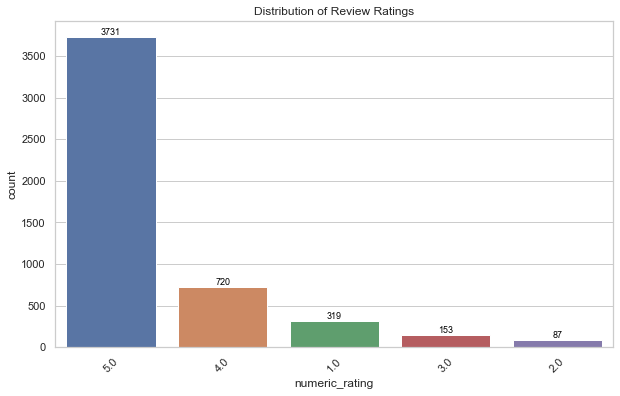

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
# Set the size and style of the plot
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
# Visualize the distribution of review ratings
sns.countplot(data=df, x='numeric_rating', order=df['numeric_rating'].value_counts().index)  # Order by value counts
plt.title("Distribution of Review Ratings")
# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
# Add labels to the bars
for p in plt.gca().patches:
    plt.gca().annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='bottom', fontsize=9, color='black')

plt.show()

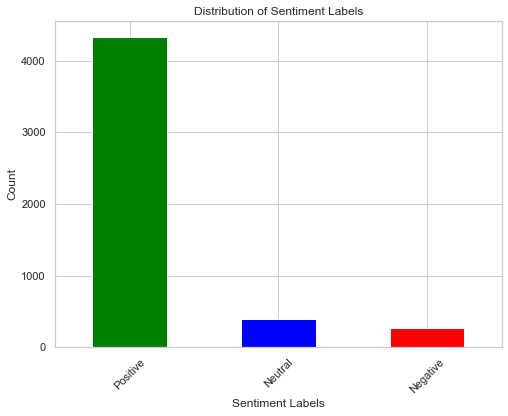

In [17]:
# 'Sentiment' is a categorical column with sentiment labels
sentiment_counts = df['sentiment_category'].value_counts()
# Define colors for each sentiment label
colors = {'Positive': 'green', 'Neutral': 'blue', 'Negative': 'red'}
# Create a bar chart
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=[colors[label] for label in sentiment_counts.index])
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment Labels')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

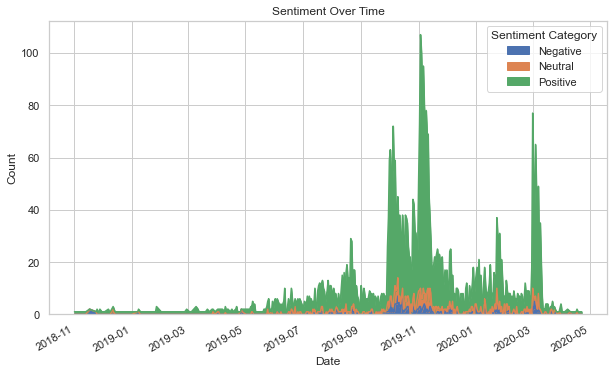

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the 'reviewed_at' column to datetime format
df['reviewed_at'] = pd.to_datetime(df['reviewed_at'], format='%d-%m-%Y')

# Group the data by 'reviewed_at' and 'sentiment_category' and count the occurrences of each sentiment category for each date
sentiment_counts = df.groupby(['reviewed_at', 'sentiment_category']).size().unstack(fill_value=0)

# Plot the sentiment over time using a stacked area chart
sentiment_counts.plot.area(figsize=(10, 6), stacked=True)

# Customize the plot
plt.title('Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend(title='Sentiment Category')

# Show the plot
plt.show()


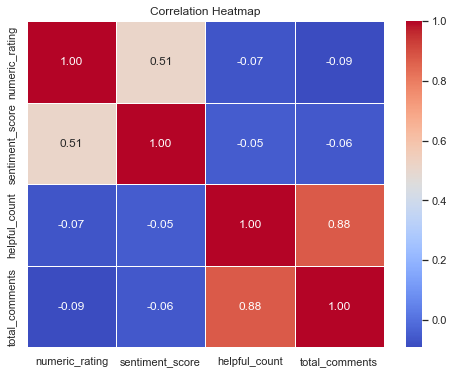

In [19]:
# Select the numeric columns for correlation analysis
numeric_columns = ['numeric_rating','sentiment_score','helpful_count','total_comments']

# Calculate the correlation matrix
correlation_matrix = df[numeric_columns].corr()

# Create a correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

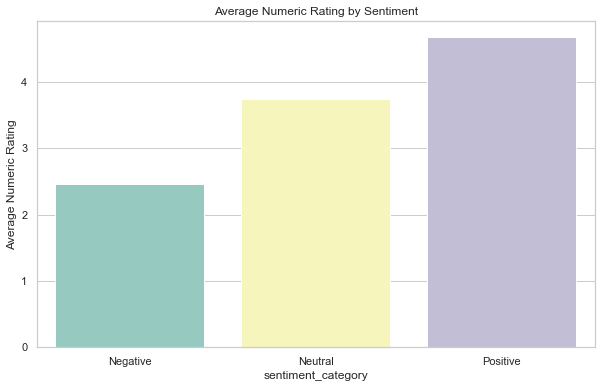

In [20]:
# Calculate the average numeric rating for each sentiment category
average_ratings = df.groupby('sentiment_category')['numeric_rating'].mean().reset_index()

# Set the style
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='sentiment_category', y='numeric_rating', data=average_ratings, palette='Set3')
plt.title('Average Numeric Rating by Sentiment')
plt.xlabel('sentiment_category')
plt.ylabel('Average Numeric Rating')
plt.show()

In [21]:
!pip install --upgrade pip
!pip install --upgrade pillow

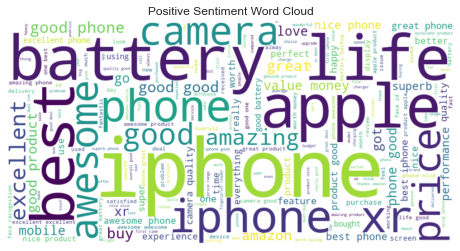

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Select rows with "Positive" sentiment
positive_reviews = df[df['sentiment_category'] == 'Positive']

# Combine the cleaned reviews for positive sentiment
positive_text = ' '.join(positive_reviews['cleaned_reviews'])

# Create WordCloud for positive sentiment without specifying a font
wordcloud_positive = WordCloud(
    width=800, height=400, background_color='white', prefer_horizontal=0.4 # Adjust this value
).generate(positive_text)

# Plot the WordCloud
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Positive Sentiment Word Cloud')
plt.axis('off')

plt.show()


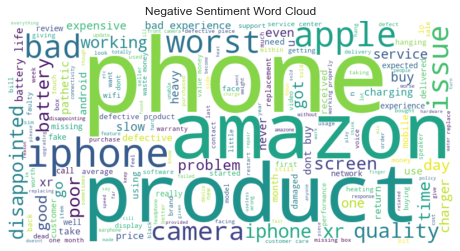

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Select rows with "Negative" sentiment
negative_reviews = df[df['sentiment_category'] == 'Negative']

# Combine the cleaned reviews for negative sentiment
negative_text = ' '.join(negative_reviews['cleaned_reviews'])

# Create WordCloud for negative sentiment
wordcloud_negative = WordCloud(
    width=800, height=400, background_color='white', prefer_horizontal=0.4 # Adjust this value
).generate(negative_text)

# Plot the WordCloud for negative sentiment
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Negative Sentiment Word Cloud')
plt.axis('off')

plt.show()



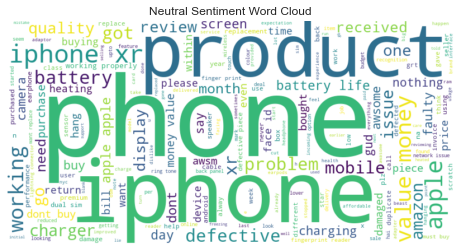

In [24]:
# Select rows with "Neutral" sentiment
neutral_reviews = df[df['sentiment_category'] == 'Neutral']

# Combine the cleaned reviews for neutral sentiment
neutral_text = ' '.join(neutral_reviews['cleaned_reviews'])

# Create WordCloud for neutral sentiment
wordcloud_neutral = WordCloud(
    width=800, height=400, background_color='white', prefer_horizontal=0.4 # Adjust this value
).generate(neutral_text)

# Plot the WordCloud for neutral sentiment
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud_neutral, interpolation='bilinear')
plt.title('Neutral Sentiment Word Cloud')
plt.axis('off')

plt.show()

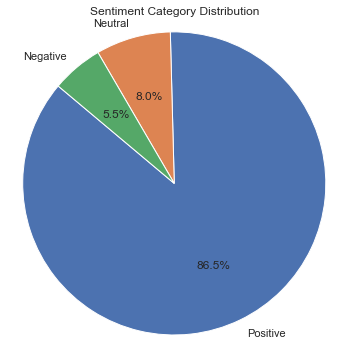

In [25]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named df with a 'sentiment_category' column

# Calculate the distribution of sentiment categories
sentiment_distribution = df['sentiment_category'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(sentiment_distribution, labels=sentiment_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Category Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.

plt.show()


In [26]:
#concentrating on the negative reviews
# Select negative reviews
negative_reviews = df[df['sentiment_category'] == 'Negative']['cleaned_reviews']

# Iterate through the negative reviews and print them
for review in negative_reviews:
    print(review)


dont buy iphone xr amazon bad experience iphone xr phone back camera found defective non functional amazon careless havent got response confirmation replacing hanging damaged piece worth rupee
worth upgrading ill know month ill use review mostly say im fan particular iphone model
dont buy iphone xr amazon bad experience iphone xr phone back camera found defective non functional amazon careless havent got response confirmation replacing hanging damaged piece worth rupee
worth upgrading ill know month ill use review mostly say im fan particular iphone model
horrible experience amazon dont buy apple product amazon got defective product activating first charging iphone started heating like anything since day replacement policy asked amazon replace product defective poor customer service amazon didnt change iphone rather told visit service centre defective product operating
fake handsetset received im facing speaker related issue given handset xr gb service center denied repair stating hand

In [27]:
from collections import Counter

# Filter negative reviews
negative_reviews = df[df['sentiment_category'] == 'Negative']['cleaned_reviews']

# Count the occurrences of each cleaned review
review_counts = Counter(negative_reviews)

# Find the most common reviews and their counts
most_common_reviews = review_counts.most_common()

# Print the most common reviews and their counts
for review, count in most_common_reviews:
    print(f"Review: {review}\nCount: {count}\n")

Review: dont buy iphone xr amazon bad experience iphone xr phone back camera found defective non functional amazon careless havent got response confirmation replacing hanging damaged piece worth rupee
Count: 2

Review: worth upgrading ill know month ill use review mostly say im fan particular iphone model
Count: 2

Review: bad bad
Count: 2

Review: horrible experience amazon dont buy apple product amazon got defective product activating first charging iphone started heating like anything since day replacement policy asked amazon replace product defective poor customer service amazon didnt change iphone rather told visit service centre defective product operating
Count: 1

Review: fake handsetset received im facing speaker related issue given handset xr gb service center denied repair stating handset fake valid warrenty
Count: 1

Review: pathetic apple iphone review taken phone phone hold many defect issue talk mouth pice precise hold voice creaky voice audible phone even partially away

In [28]:
from collections import Counter
# looking into the profile name who as posted the negative reviews repeatedly
# Filter negative reviews
negative_reviews = df[df['sentiment_category'] == 'Negative']

# Count the occurrences of each profile name
profile_name_counts = Counter(negative_reviews['profile_name'])

# Set a threshold for minimum repeated negative reviews
min_repeats = 2 # Adjust this threshold as needed

# Find profile names with more than the minimum repeats
repeated_profile_names = [profile for profile, count in profile_name_counts.items() if count >= min_repeats]

# Print the profile names and corresponding negative reviews
for profile_name in repeated_profile_names:
    profile_reviews = negative_reviews[negative_reviews['profile_name'] == profile_name]['cleaned_reviews']
    
    print(f"Profile Name: {profile_name}")
    for review in profile_reviews:
        print(f"Review: {review}\n")
    print("\n")


Profile Name: Amazon Customer
Review: dont buy iphone xr amazon bad experience iphone xr phone back camera found defective non functional amazon careless havent got response confirmation replacing hanging damaged piece worth rupee

Review: dont buy iphone xr amazon bad experience iphone xr phone back camera found defective non functional amazon careless havent got response confirmation replacing hanging damaged piece worth rupee

Review: horrible experience amazon dont buy apple product amazon got defective product activating first charging iphone started heating like anything since day replacement policy asked amazon replace product defective poor customer service amazon didnt change iphone rather told visit service centre defective product operating

Review: worst camera poor front camera take photo light background photo attached

Review: heavy weight phone heavy weight u use ull feel hard hold regular note

Review: waste money battery quality worst honor give day backup phone last 

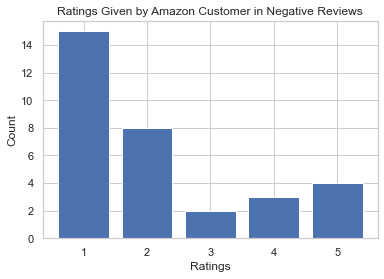

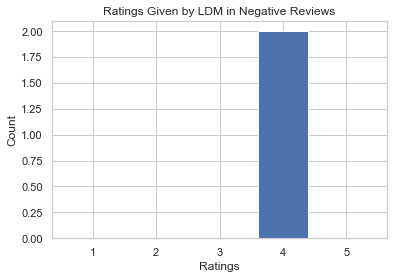

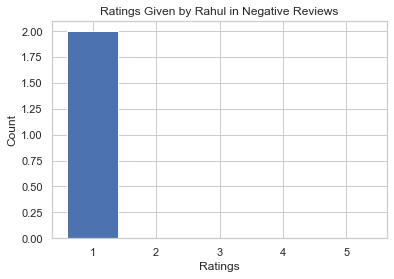

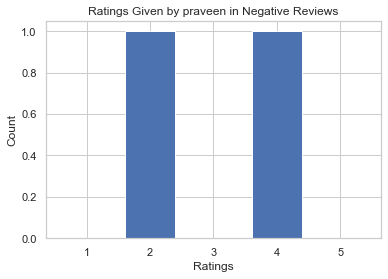

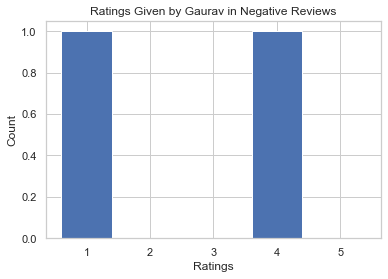

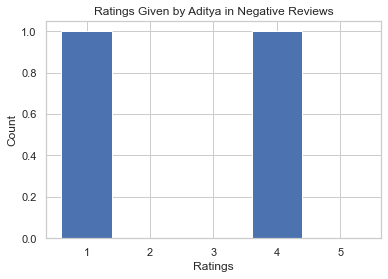

In [29]:
import matplotlib.pyplot as plt

# Create a dictionary to store the counts of each rating for each profile name
profile_rating_counts = {}

# Count the ratings given by the repeated profile names
for profile_name in repeated_profile_names:
    profile_ratings = negative_reviews[negative_reviews['profile_name'] == profile_name]['numeric_rating']
    rating_count = {1: 0, 2: 0, 3: 0, 4: 0, 5: 0}
    for rating in profile_ratings:
        rating_count[rating] += 1
    profile_rating_counts[profile_name] = rating_count

# Plot the bar chart for each profile name
for profile_name, rating_count in profile_rating_counts.items():
    ratings = list(rating_count.keys())
    counts = list(rating_count.values())
    
    plt.bar(ratings, counts)
    plt.xlabel('Ratings')
    plt.ylabel('Count')
    plt.title(f'Ratings Given by {profile_name} in Negative Reviews')
    plt.xticks(ratings)
    plt.show()


##### Feature Engineering

selecting independent and dependent features
.checking for class imbalance
.Handling the Imbalanced data
.Spliting the data to train and test
.feature selection

###### checking for class imbalance

In [30]:
sentiment_counts = df['sentiment_category'].value_counts()
print(sentiment_counts)

Positive    4335
Neutral      400
Negative     275
Name: sentiment_category, dtype: int64


Feature extraction using TF-IDF,spliting the dataset

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Selecting independent variables (features)
X = df['cleaned_reviews']
# Dependent variable (target)
y = df['sentiment_category']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the TF-IDF vectorizer for text features
tfidf_vectorizer = TfidfVectorizer(max_features=1000) 

# Fit and transform the training text data (converting reviews into vectors)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Print vector representation of the first cleaned review
sample_review_vector = X_train_tfidf[0]  #  want to see the vector of the first review
print("Vector Representation of the First Cleaned Review:")
print(sample_review_vector.toarray())  # Convert sparse matrix to dense array

# Transform the test text data using the same vectorizer
X_test_tfidf = tfidf_vectorizer.transform(X_test)


Vector Representation of the First Cleaned Review:
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.23672647
  0.         0.         0.         0.         0.         0.
  0.         0.47973051 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.    

In [32]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
# Initialize the CountVectorizer for counting features before TF-IDF
count_vectorizer = CountVectorizer()
X_count = count_vectorizer.fit_transform(X)
num_features_before_tfidf = X_count.shape[1]  # Get the number of columns (features) before TF-IDF
num_features_after_tfidf = X_train_tfidf.shape[1]  # Get the number of columns (features) after TF-IDF

print("Number of Features Before TF-IDF:", num_features_before_tfidf)
print("Number of Features After TF-IDF:", num_features_after_tfidf)

Number of Features Before TF-IDF: 4025
Number of Features After TF-IDF: 1000


In [33]:
# Get the list of feature names
feature_names = tfidf_vectorizer.get_feature_names_out()

# Print the number of features
num_features = len(feature_names)
print("Names of Features:", feature_names)

Names of Features: ['able' 'absolute' 'absolutely' 'accessory' 'according' 'accurate'
 'actually' 'adapter' 'adaptor' 'afford' 'affordable' 'almost' 'along'
 'already' 'also' 'although' 'always' 'amazing' 'amazingly' 'amazon'
 'amazone' 'among' 'amount' 'android' 'another' 'answer' 'anymore'
 'anyone' 'anything' 'apart' 'app' 'apple' 'application' 'apps' 'around'
 'arrived' 'art' 'asked' 'aspect' 'assembled' 'attractive' 'audio'
 'authorised' 'automatically' 'available' 'average' 'awasome' 'away'
 'awesome' 'awsm' 'awsome' 'back' 'backup' 'bad' 'bang' 'bangalore' 'bank'
 'bargain' 'batter' 'battery' 'beast' 'beat' 'beautiful' 'beauty' 'become'
 'becomes' 'believe' 'best' 'better' 'bezel' 'big' 'bigger' 'bill'
 'billion' 'bionic' 'bit' 'black' 'blindly' 'blowing' 'blue' 'bomb'
 'bothering' 'bottom' 'bought' 'box' 'brand' 'branded' 'brilliant'
 'brings' 'brought' 'bt' 'buck' 'budget' 'build' 'built' 'bulky'
 'business' 'butter' 'buttery' 'button' 'buy' 'buying' 'bye' 'cable'
 'call' 'cal

In [34]:
from imblearn.over_sampling import SMOTE
import numpy as np
# Initialize SMOTE for oversampling(handling class imbalance)
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Apply SMOTE to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_tfidf, y_train)

# Print resampled class distribution
print("Resampled Class Distribution:")
unique, counts = np.unique(y_train_resampled, return_counts=True)
for label, count in zip(unique, counts):
    print(f"Class {label}: {count} samples")

Resampled Class Distribution:
Class Negative: 3456 samples
Class Neutral: 3456 samples
Class Positive: 3456 samples


Feature Selection: Feature selection is the process of selecting a subset of the most relevant and informative features from the original set of features.

In [35]:
from sklearn.feature_selection import SelectKBest, chi2

# Initialize the SelectKBest feature selector
# Here, let's say we want to select the top 500 features
num_features_to_select = 500
feature_selector = SelectKBest(chi2, k=num_features_to_select)

# Fit the feature selector on the training data
feature_selector.fit(X_train_tfidf, y_train)

# Get the indices of the selected features
selected_feature_indices = feature_selector.get_support(indices=True)

# Get the feature names from the TF-IDF vectorizer
selected_feature_names = tfidf_vectorizer.get_feature_names_out()[selected_feature_indices]

# Print the selected feature indices
print("Indices of Selected Features:")
print(selected_feature_indices)

# Print the selected feature names
print("Selected Feature Names:")
print(selected_feature_names)

Indices of Selected Features:
[  2   3   7   8  10  14  16  17  19  20  22  26  27  28  29  30  31  32
  37  43  44  45  46  48  49  50  52  53  55  58  59  60  61  62  63  64
  65  67  68  71  72  76  78  82  84  86  87  92  93 100 102 103 104 106
 108 109 110 113 115 119 120 121 123 126 127 129 131 132 133 137 139 141
 144 145 147 148 152 157 159 161 163 165 166 169 170 171 173 174 177 178
 181 185 186 187 188 189 191 194 195 197 199 200 201 206 208 215 216 218
 220 221 223 225 226 227 233 236 238 240 241 244 249 253 254 257 258 259
 260 262 263 264 266 269 271 272 278 279 280 282 283 284 286 287 290 291
 292 293 295 296 297 306 307 308 309 310 313 319 321 322 323 324 325 326
 330 334 336 338 339 340 342 343 344 349 350 351 358 361 363 364 368 369
 372 374 376 377 378 379 380 381 382 384 385 388 389 393 395 397 398 399
 407 409 410 413 414 416 419 420 425 427 429 430 434 435 439 440 441 445
 446 447 449 451 453 455 457 459 460 475 477 478 479 482 483 484 485 487
 488 489 490 492 493 

###### Hyper parameter Tuning


In [36]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import uniform
# Create a Multinomial Naive Bayes classifier
naive_bayes = MultinomialNB()
# Define the parameter grid for RandomizedSearchCV
random_param_grid = {
    'alpha': uniform(0.01, 1.0),  # Ensure positive values
    'fit_prior': [True, False]
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(naive_bayes, random_param_grid, cv=5, scoring='accuracy', n_iter=10, random_state=42)

# Fit the RandomizedSearchCV on the resampled training data
random_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters from RandomizedSearchCV
best_params_random = random_search.best_params_

# Define the parameter grid for GridSearchCV
grid_param_grid = {
    'alpha': [best_params_random['alpha'] * 0.9, best_params_random['alpha'], best_params_random['alpha'] * 1.1],  # Adjust the alpha values
    'fit_prior': [True, False]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(naive_bayes, grid_param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV on the resampled training data
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters from GridSearchCV
best_params_grid = grid_search.best_params_

print("Best Parameters from RandomizedSearchCV:", best_params_random)
print("Best Parameters from GridSearchCV:", best_params_grid)


Best Parameters from RandomizedSearchCV: {'alpha': 0.010778765841014329, 'fit_prior': False}
Best Parameters from GridSearchCV: {'alpha': 0.009700889256912896, 'fit_prior': True}


#### Evaluation Metrics

In [37]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report

# Initialize the Multinomial Naive Bayes classifier with the best parameters
best_alpha_random = best_params_random['alpha']
best_fit_prior_random = best_params_random['fit_prior']
best_naive_bayes_random = MultinomialNB(alpha=best_alpha_random, fit_prior=best_fit_prior_random)

best_alpha_grid = best_params_grid['alpha']
best_fit_prior_grid = best_params_grid['fit_prior']
best_naive_bayes_grid = MultinomialNB(alpha=best_alpha_grid, fit_prior=best_fit_prior_grid)

# Fit the model on the resampled training data
best_naive_bayes_random.fit(X_train_resampled, y_train_resampled)
best_naive_bayes_grid.fit(X_train_resampled, y_train_resampled)

# Use cross_val_predict to predict on the test data using cross-validation
y_pred_random_cv = cross_val_predict(best_naive_bayes_random, X_test_tfidf, y_test, cv=5)
y_pred_grid_cv = cross_val_predict(best_naive_bayes_grid, X_test_tfidf, y_test, cv=5)

# Evaluate the models using classification report
print("Evaluation Report for RandomizedSearchCV Best Model with Cross-Validation MNB:")
print(classification_report(y_test, y_pred_random_cv))

print("\nEvaluation Report for GridSearchCV Best Model with Cross-Validation MNB:")
print(classification_report(y_test, y_pred_grid_cv))


Evaluation Report for RandomizedSearchCV Best Model with Cross-Validation MNB:
              precision    recall  f1-score   support

    Negative       0.31      0.60      0.41        58
     Neutral       0.44      0.38      0.41        65
    Positive       0.96      0.91      0.93       879

    accuracy                           0.85      1002
   macro avg       0.57      0.63      0.58      1002
weighted avg       0.88      0.85      0.87      1002


Evaluation Report for GridSearchCV Best Model with Cross-Validation MNB:
              precision    recall  f1-score   support

    Negative       0.48      0.26      0.34        58
     Neutral       0.47      0.11      0.18        65
    Positive       0.90      0.98      0.94       879

    accuracy                           0.88      1002
   macro avg       0.62      0.45      0.48      1002
weighted avg       0.85      0.88      0.86      1002



In [38]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

# Calculate ROC-AUC scores for each class using OvR approach
y_prob_random = best_naive_bayes_random.predict_proba(X_test_tfidf)
y_prob_grid = best_naive_bayes_grid.predict_proba(X_test_tfidf)

roc_auc_scores_random = roc_auc_score(y_test, y_prob_random, multi_class='ovr')
roc_auc_scores_grid = roc_auc_score(y_test, y_prob_grid, multi_class='ovr')

# Print ROC-AUC scores for each class
print("\nROC-AUC Score for RandomizedSearchCV Best Model:", roc_auc_scores_random)
print("\nROC-AUC Score for GridSearchCV Best Model:", roc_auc_scores_grid)



ROC-AUC Score for RandomizedSearchCV Best Model: 0.9089724417586883

ROC-AUC Score for GridSearchCV Best Model: 0.9082198246584507


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Initialize SVM classifier
svm_classifier = SVC(probability=True)

# Define a smaller parameter grid for random search
param_dist = {
    'C': np.logspace(-1, 1, 5),          # Reduce the range of regularization parameter
    'kernel': ['linear', 'rbf'],        # Limit to linear and rbf kernels
    'gamma': ['scale', 'auto']          # Use only 'scale' and 'auto' for gamma
}

# Initialize RandomizedSearchCV with the SVM classifier and smaller parameter grid
random_search = RandomizedSearchCV(
    svm_classifier, param_distributions=param_dist, n_iter=10, cv=5, scoring='f1_micro', n_jobs=-1
)

# Fit the random search on the resampled training data
random_search.fit(X_train_resampled, y_train_resampled)

# Get the best SVM classifier from random search
best_svm_classifier = random_search.best_estimator_

# Predict on the test data using the best classifier
y_pred = best_svm_classifier.predict(X_test_tfidf)

# Evaluate the classifier using classification report
print("Classification Report for Best SVM classifier (randomsearchcv):")
print(classification_report(y_test, y_pred))


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report ,roc_auc_score
from sklearn.model_selection import RandomizedSearchCV 
import numpy as np

# Initialize SVM classifier
svm_classifier = SVC(probability=True)

# Define the parameter grid for random search
param_dist = {
    'C': np.logspace(-3, 3, 7),          # Range of regularization parameter
    'kernel': ['linear', 'rbf', 'poly'], # Different kernel options
    'gamma': ['scale', 'auto'] + list(np.logspace(-3, 3, 7)) # Kernel coefficient for 'rbf' and 'poly'
}

# Initialize RandomizedSearchCV with the SVM classifier and parameter grid
random_search = RandomizedSearchCV(
    svm_classifier, param_distributions=param_dist, n_iter=50, cv=5, scoring='f1_micro', n_jobs=-1
)

# Fit the random search on the resampled training data
random_search.fit(X_train_resampled, y_train_resampled)

# Get the best SVM classifier from random search
best_svm_classifier = random_search.best_estimator_

# Predict on the test data using the best classifier
y_pred = best_svm_classifier.predict(X_test_tfidf)

# Evaluate the classifier using classification report
print("Classification Report for Best Svm classifier(randomsearchcv) :")
print(classification_report(y_test, y_pred))



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier()

# Define the parameter grid for random search
param_dist = {
    'n_estimators': [100, 200, 300],          # Number of trees in the forest
    'max_depth': [10, 20, 30],                # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],          # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],            # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]                # Whether bootstrap samples are used
}

# Initialize RandomizedSearchCV with the Random Forest classifier and parameter grid
random_search = RandomizedSearchCV(
    rf_classifier, param_distributions=param_dist, n_iter=50, cv=5, scoring='f1_micro', n_jobs=-1
)

# Fit the random search on the resampled training data
random_search.fit(X_train_resampled, y_train_resampled)

# Get the best Random Forest classifier from random search
best_rf_classifier = random_search.best_estimator_

# Predict on the test data using the best classifier
y_pred = best_rf_classifier.predict(X_test_tfidf)

from sklearn.model_selection import cross_val_score

# Evaluate the best Random Forest classifier using cross-validation
scores = cross_val_score(best_rf_classifier, X_train_resampled, y_train_resampled, cv=5, scoring='f1_micro', n_jobs=-1)

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)
print("Mean CV Score:", scores.mean())
print("Standard Deviation of CV Scores:", scores.std())


# Evaluate the classifier using classification report
print("Classification Report for Best Random Forest Classifier (Resampled):")
print(classification_report(y_test, y_pred))


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
import numpy as np

# Create the KNN classifier
knn_classifier = KNeighborsClassifier()

# Define the parameter distribution for RandomizedSearchCV
param_dist = {
    'n_neighbors': np.arange(1, 21),  # Range of number of neighbors
    'weights': ['uniform', 'distance'],  # Weighting scheme for neighbors
    'p': [1, 2]  # Distance metric (1: Manhattan, 2: Euclidean)
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(knn_classifier, param_distributions=param_dist, n_iter=50, cv=5, scoring='f1_micro', n_jobs=-1)

# Fit the RandomizedSearchCV on the resampled training data
random_search.fit(X_train_resampled, y_train_resampled)

# Get the best KNN classifier from RandomizedSearchCV
best_knn_classifier = random_search.best_estimator_

# Initialize StandardScaler with with_mean=False for sparse matrices
scaler = StandardScaler(with_mean=False)

# Scale the features using StandardScaler
X_test_scaled = scaler.fit_transform(X_test_tfidf)

# Predict on the scaled test data using the best classifier
y_pred = best_knn_classifier.predict(X_test_scaled)

# Evaluate the classifier using classification report
print("Classification Report for Best KNN Classifier (Resampled):")
print(classification_report(y_test, y_pred))


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
import numpy as np

# Initialize SVM classifier
svm_classifier = SVC()

# Define the parameter grid for grid search
param_grid = {
    'C': np.logspace(-3, 3, 7),          # Range of regularization parameter
    'kernel': ['linear', 'rbf', 'poly'], # Different kernel options
    'gamma': ['scale', 'auto'] + list(np.logspace(-3, 3, 7)) # Kernel coefficient for 'rbf' and 'poly'
}

# Initialize GridSearchCV with the SVM classifier and parameter grid
grid_search = GridSearchCV(
    svm_classifier, param_grid=param_grid, cv=5, scoring='f1_micro', n_jobs=-1
)

# Fit the grid search on the resampled training data
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best SVM classifier from grid search
best_svm_classifier = grid_search.best_estimator_

# Predict on the test data using the best classifier
y_pred = best_svm_classifier.predict(X_test_tfidf)

# Evaluate the classifier using classification report
print("Classification Report for Best SVM Classifier (Resampled):")
print(classification_report(y_test, y_pred))
